## Importing Libraries

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.metrics import auc, roc_curve

## Data Preprocessing

In [ ]:
!unzip "/content/drive/MyDrive/test1/dataset.zip"

In [3]:
train_X = []
train_y = []

test_X = []
test_y = []

In [4]:
train = os.listdir('/content/dataset/train')

In [5]:
for i in range(len(train)):
    if os.path.isdir("/content/dataset/train/" + train[i]):
        for j in range(len(os.listdir('/content/dataset/train/' + train[i]))):
            img = np.load('/content/dataset/train/' + train[i] + '/' + os.listdir('/content/dataset/train/' + train[i])[j])
            img = cv2.resize(img[0], (75, 75))
            img = np.stack([img, img, img], -1)
            train_X.append(img)
            train_y.append(train[i])
        print(train[i] + ' loaded')

sphere loaded
vort loaded
no loaded


In [6]:
train = list(zip(train_X, train_y)) # shuffle train data

random.shuffle(train)

train_X, train_y = zip(*train)

del train

In [7]:
val = os.listdir('/content/dataset/val')

In [8]:
for i in range(len(val)):
    if os.path.isdir("/content/dataset/val/" + val[i]):
        for j in range(len(os.listdir('/content/dataset/val/' + val[i]))):
            img = np.load('/content/dataset/val/' + val[i] + '/' + os.listdir('/content/dataset/val/' + val[i])[j])
            img = cv2.resize(img[0], (75, 75))
            img = np.stack([img, img, img], -1)
            test_X.append(img)
            test_y.append(val[i])
        print(val[i] + ' loaded')

sphere loaded
vort loaded
no loaded


In [9]:
val = list(zip(test_X, test_y)) # shuffle test data

random.shuffle(val) 

test_X, test_y = zip(*val)

del val

## Look at Data

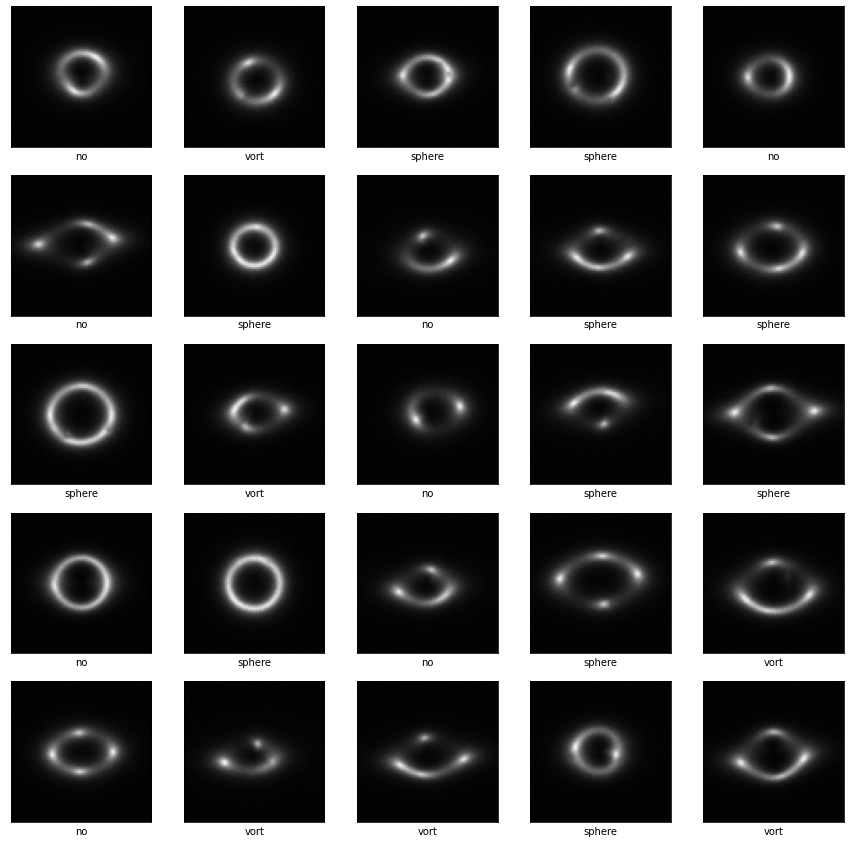

In [10]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i])
    plt.xlabel(train_y[i])
plt.show()

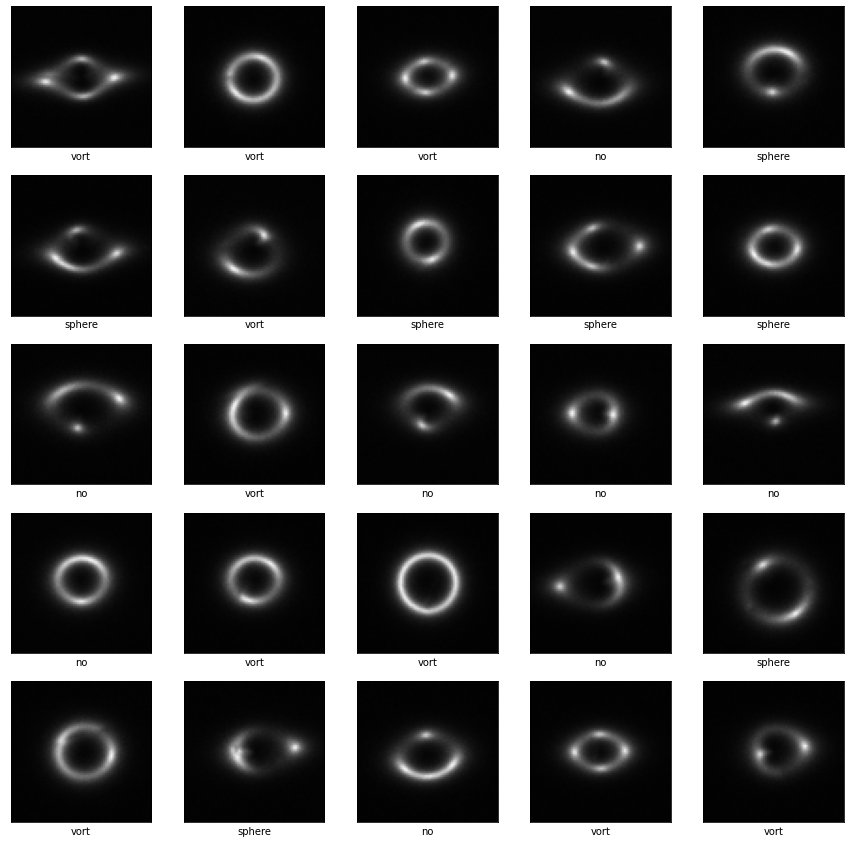

In [11]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_X[i])
    plt.xlabel(test_y[i])
plt.show()

In [12]:
le = LabelEncoder()

train_y = le.fit_transform(train_y)
test_y = le.fit_transform(test_y)

In [15]:
train_X = np.array(train_X)
train_y = np.array(train_y)

test_X = np.array(test_X)
test_y = np.array(test_y)

In [16]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((30000, 75, 75, 3), (30000,), (7500, 75, 75, 3), (7500,))

## Training

In [17]:
model = tf.keras.applications.Xception(
          include_top=True, 
          weights=None,
          input_shape=(75, 75, 3),
          classes=3,
          classifier_activation='softmax'
        )
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_X, train_y, epochs=100, validation_data=(test_X, test_y))

Epoch 1/100
938/938 [==============================] - 109s 97ms/step - loss: 1.1335 - accuracy: 0.3347 - val_loss: 1.2278 - val_accuracy: 0.3333
Epoch 2/100
938/938 [==============================] - 90s 96ms/step - loss: 1.1176 - accuracy: 0.3348 - val_loss: 1.1156 - val_accuracy: 0.3333
Epoch 3/100
938/938 [==============================] - 87s 93ms/step - loss: 1.1188 - accuracy: 0.3332 - val_loss: 1.1004 - val_accuracy: 0.3331
Epoch 4/100
938/938 [==============================] - 88s 94ms/step - loss: 1.1165 - accuracy: 0.3278 - val_loss: 1.4396 - val_accuracy: 0.3321
Epoch 5/100
938/938 [==============================] - 88s 94ms/step - loss: 1.1165 - accuracy: 0.3330 - val_loss: 1.1016 - val_accuracy: 0.3333
Epoch 6/100
938/938 [==============================] - 88s 94ms/step - loss: 1.1086 - accuracy: 0.3303 - val_loss: 3.5192 - val_accuracy: 0.3388
Epoch 7/100
938/938 [==============================] - 88s 94ms/step - loss: 1.1038 - accuracy: 0.3311 - val_loss: 1.3691 - val_a

## Plotting ROC

In [19]:
prediction = model.predict(test_X)

for i in prediction:
    k = np.argmax(i)
    for j in range(3):
        if j == k:
            i[j] = 1
        else:
            i[j] = 0



temp_test_y = []

for i in range(len(test_y)):
    a = [0, 0, 0]
    a[test_y[i]] = 1
    temp_test_y.append(a)

temp_test_y = np.array(temp_test_y)

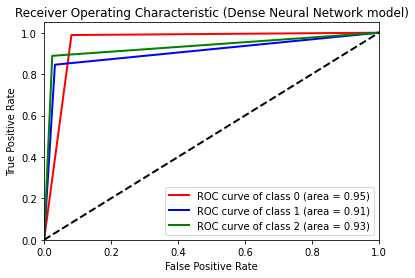

In [20]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(temp_test_y[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['red', 'blue', 'green']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
             
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Dense Neural Network model)')
plt.legend(loc="lower right")
plt.show()

In [21]:
model.save('75x75x3_Xception_100epoch_acc91.h5')

## Further Reading

In [23]:
# We can try another pre-trained model like ResNet, VGG16, VGG16, etc.
# Also try data augmentation.
# Model can be trained on more powerful cloud resources.

## Sahil Bharodiya
### Email: sahilbharodiya.ppsv2@gmail.com
### Contact: +91 9173661451
### LinkedIn: https://www.linkedin.com/in/sahil-bharodiya-5ab137202/
### GitHub: https://github.com/SahilBharodiya